In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [17]:
class data_visualisation:
    def __init__(self, df, instance):
        self.df=df
        self.df=self.df[self.df['Instance']==instance]
                                
    def summarise_and_plot(self):

        # Define the parameters to plot
        parameters = ['Cp', 'Number childrens', 'Desired expansion policy', 'Desired simulation policy', 'Desired selection policy',"Ratio expansion"]

        # Calculate figure size based on the number of parameters
        num_params = len(parameters)
        fig_width = 6 * num_params  # 6 units width per parameter
        fig_height = 6  # Keep the height fixed for each row

        # Plotting Time to Find Solution vs parameters in the first row
        plt.figure(figsize=(fig_width, fig_height * 2))

        for i, param in enumerate(parameters):
            plt.subplot(2, num_params, i + 1)  # First row
            sns.violinplot(x=param, y='Time to find the solution', data=self.df, inner="quartile", split=True)
            plt.title(f'Time to Find Solution vs {param}')
            plt.xlabel(param)
            plt.ylabel('Time to Find Solution (seconds)')

        # Plotting Total Cost vs parameters in the second row
        for i, param in enumerate(parameters):
            plt.subplot(2, num_params, i + 1 + num_params)  # Second row
            sns.violinplot(x=param, y='Best node - cost', data=self.df, inner="quartile", split=True)
            plt.title(f'Total Cost vs {param}')
            plt.xlabel(param)
            plt.ylabel('Total Cost')

        plt.tight_layout()
        plt.show()
        
    def plot_selection_simulation_counts(self, instance_number):
        # Create the DataFrame
        df = self.df.copy()

        # Filter the DataFrame by the specific instance number
        instance_str = f'{instance_number}.in.in'
        df_instance = df[df['Instance Path'] == instance_str]

        if df_instance.empty:
            print(f"No data found for instance {instance_number}")
            return
        
        # Create the Parameters column by removing the trailing "_digit.log"
        df_instance['Parameters'] = df_instance['File'].str.extract(r'(.+)_\d+\.log')

        # Melt the DataFrame to create a single 'Counts' column with 'Category' as Selections/Simulations
        melted_df = pd.melt(df_instance, id_vars=['Parameters'], value_vars=['Number of Selection', 'Number of Simulation'], 
                            var_name='Category', value_name='Counts')

        # Replace 'Number of Selection' and 'Number of Simulation' with more readable labels
        melted_df['Category'] = melted_df['Category'].replace({
            'Number of Selection': 'Selections',
            'Number of Simulation': 'Simulations'
        })
        
        scaler = MinMaxScaler()
        melted_df['Scaled Counts'] = scaler.fit_transform(melted_df[['Counts']])


        # Set up the plot
        plt.figure(figsize=(16, 8))

        # Plot the violin plot with 'Parameters' on x-axis and 'Counts' on y-axis, with 'Category' differentiating the hue
        sns.violinplot(x='Parameters', y='Counts', hue='Category', data=melted_df, split=True, inner="quartile", palette={"Selections": "skyblue", "Simulations": "lightgreen"})

        # Add labels and title
        plt.title(f'Number of Selections and Simulations for Instance {instance_number}')
        plt.xlabel('Parameters')
        plt.ylabel('Counts')
        plt.xticks(rotation=45, ha="right")
        plt.legend(title='Category')

        # Show the plot
        plt.tight_layout()
        plt.show()
    
    def cp_vs_cost(self, instance_number):
        # Create the DataFrame
        df = self.df.copy()

        # Filter the DataFrame by the specific instance number
        instance_str = f'{instance_number}.in.in'
        df_instance = df[df['Instance Path'] == instance_str]

        if df_instance.empty:
            print(f"No data found for instance {instance_number}")
            return


        palette = sns.color_palette("pastel", n_colors=len(df_instance['Desired Selection Policy'].unique()))

        plt.figure(figsize=(16, 8))
        sns.violinplot(data=df_instance,  # Ensure to use df_instance
                    x="Cp",
                    y="Total Cost",
                    hue="Desired Selection Policy",
                    palette=palette)  # Apply the pastel palette

        plt.title(f"Cp vs Total Cost by Selection Policy - Instance {instance_number}")
        plt.xlabel("Cp Value")
        plt.ylabel("Total Cost")
        plt.tight_layout()
        plt.show()
        
    def cp_vs_total_time(self, instance_number):
        # Create the DataFrame
        df = self.df.copy()

        # Filter the DataFrame by the specific instance number
        instance_str = f'{instance_number}.in.in'
        df_instance = df[df['Instance Path'] == instance_str]

        if df_instance.empty:
            print(f"No data found for instance {instance_number}")
            return


        palette = sns.color_palette("pastel", n_colors=len(df_instance['Desired Selection Policy'].unique()))

        plt.figure(figsize=(16, 8))
        sns.violinplot(data=df_instance,  # Ensure to use df_instance
                    x="Cp",
                    y="Total time",
                    hue="Desired Selection Policy",
                    palette=palette)  # Apply the pastel palette

        plt.title(f"Cp vs Total time by Selection Policy - Instance {instance_number}")
        plt.xlabel("Cp Value")
        plt.ylabel("Total time")
        plt.tight_layout()
        plt.show()
        
    def cp_vs_number_selection(self, instance_number):
        # Create the DataFrame
        df = self.df.copy()

        # Filter the DataFrame by the specific instance number
        instance_str = f'{instance_number}.in.in'
        df_instance = df[df['Instance Path'] == instance_str]

        if df_instance.empty:
            print(f"No data found for instance {instance_number}")
            return


        palette = sns.color_palette("pastel", n_colors=len(df_instance['Desired Selection Policy'].unique()))

        plt.figure(figsize=(16, 8))
        sns.violinplot(data=df_instance,  # Ensure to use df_instance
                    x="Cp",
                    y="Number of Selection",
                    hue="Desired Selection Policy",
                    palette=palette,
                    split=True)  # Apply the pastel palette

        plt.title(f"Cp vs Total time by Selection Policy - Instance {instance_number}")
        plt.xlabel("Cp Value")
        plt.ylabel("Total time")
        plt.tight_layout()
        plt.show()
        
    def multi_variable_scatter(self, instance_number):
        df = self.df.copy()
        instance_str = f'{instance_number}.in.in'
        df_instance = df[df['Instance Path'] == instance_str]

        if df_instance.empty:
            print(f"No data found for instance {instance_number}")
            return

        sns.pairplot(df_instance, 
                    vars=["Cp", "Total Cost", "Total time","Number of Simulation","Number of Selection"], 
                    hue="Desired Selection Policy", 
                    palette="pastel", 
                    markers=["o", "s", "D", "^"], 
                    plot_kws={'alpha': 0.5})
        plt.suptitle(f'Multi-variable Analysis for Instance {instance_number}', y=1.02)
        plt.show()

In [18]:
df=pd.read_excel("/Users/adslv/Documents/LU/Term 3/Kiwi_TSP_Challenge/Code/Simulation output.xlsx")
DV=data_visualisation(df=df, instance=3.0)

In [19]:
DV.df["Ratio expansion"].unique()

array([0.5])

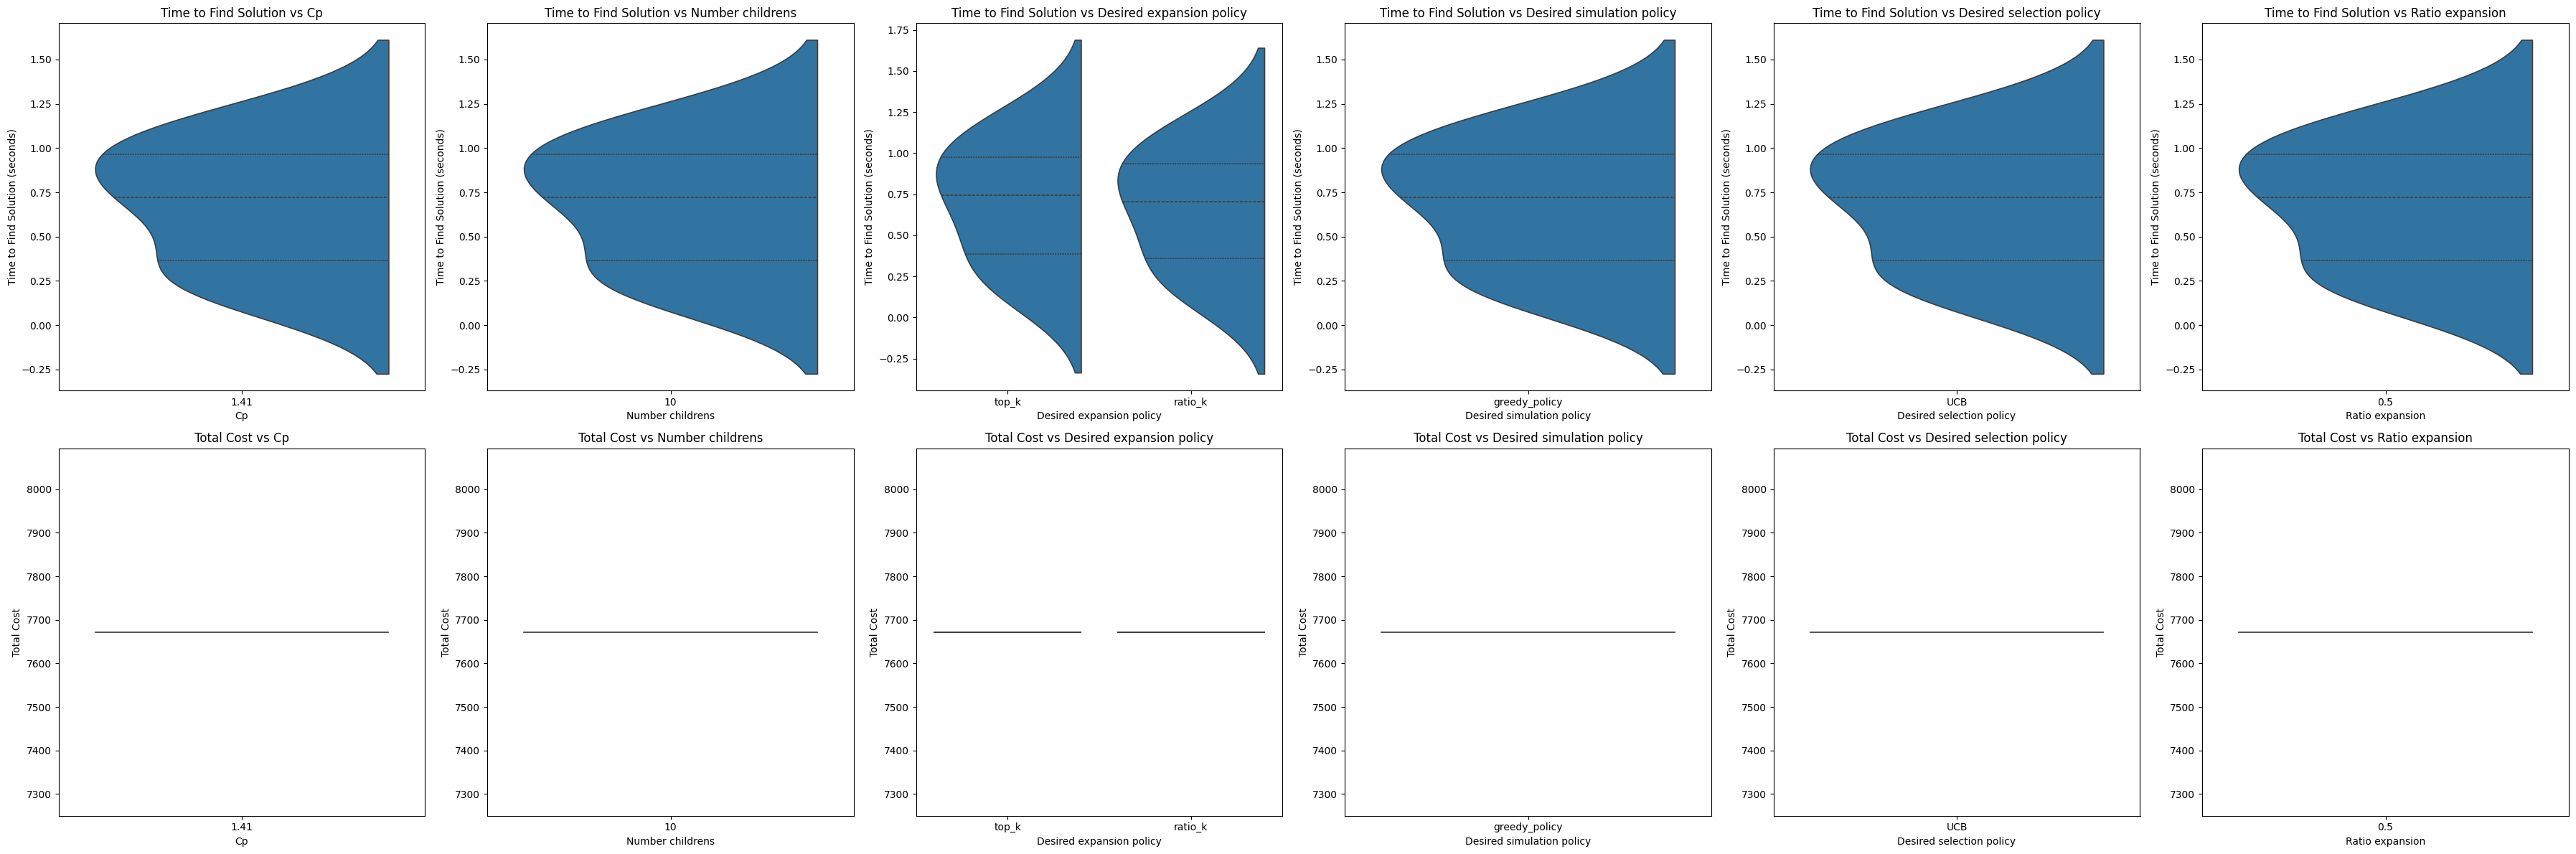

In [20]:
DV.summarise_and_plot()

In [21]:
DV.df

,Best node - day,Best node - path,Best node - cost,Time to preprocess the data,Time to find the solution,Total time,Number of SELECTION phases,Number of SIMULATION phases,Simulation dictionnary,Number childrens,Desired expansion policy,Desired simulation policy,Desired selection policy,Ratio expansion,Cp,Instance,File Path,Time
36,14,"['GDN', 'SZY', 'WMI', 'LD3', 'LB1', 'PD1', 'KR...",7672,0.0048,0.3836,0.3884,132,112,"{""['GDN', 'ZC3']"": {'current_day': 14, 'curren...",10,top_k,greedy_policy,UCB,0.5,1.41,3,/Users/adslv/Documents/LU/Term 3/Kiwi_TSP_Chal...,23:03:06.398037
37,14,"['GDN', 'SZY', 'WMI', 'LD3', 'LB1', 'PD1', 'KR...",7672,0.0048,0.1461,0.1509,132,112,"{""['GDN', 'ZC3']"": {'current_day': 14, 'curren...",10,top_k,greedy_policy,UCB,0.5,1.41,3,/Users/adslv/Documents/LU/Term 3/Kiwi_TSP_Chal...,23:03:06.407872
38,14,"['GDN', 'SZY', 'WMI', 'LD3', 'LB1', 'PD1', 'KR...",7672,0.0048,0.2646,0.2694,132,112,"{""['GDN', 'ZC3']"": {'current_day': 14, 'curren...",10,top_k,greedy_policy,UCB,0.5,1.41,3,/Users/adslv/Documents/LU/Term 3/Kiwi_TSP_Chal...,23:03:06.417870
39,14,"['GDN', 'SZY', 'WMI', 'LD3', 'LB1', 'PD1', 'KR...",7672,0.0048,0.7422,0.7470,132,112,"{""['GDN', 'ZC3']"": {'current_day': 14, 'curren...",10,top_k,greedy_policy,UCB,0.5,1.41,3,/Users/adslv/Documents/LU/Term 3/Kiwi_TSP_Chal...,23:03:06.427792
40,14,"['GDN', 'SZY', 'WMI', 'LD3', 'LB1', 'PD1', 'KR...",7672,0.0048,0.6200,0.6248,132,112,"{""['GDN', 'ZC3']"": {'current_day': 14, 'curren...",10,top_k,greedy_policy,UCB,0.5,1.41,3,/Users/adslv/Documents/LU/Term 3/Kiwi_TSP_Chal...,23:03:06.437338
41,14,"['GDN', 'SZY', 'WMI', 'LD3', 'LB1', 'PD1', 'KR...",7672,0.0048,0.8593,0.8641,132,112,"{""['GDN', 'ZC3']"": {'current_day': 14, 'curren...",10,top_k,greedy_policy,UCB,0.5,1.41,3,/Users/adslv/Documents/LU/Term 3/Kiwi_TSP_Chal...,23:03:06.446850
42,14,"['GDN', 'SZY', 'WMI', 'LD3', 'LB1', 'PD1', 'KR...",7672,0.0048,0.9756,0.9804,132,112,"{""['GDN', 'ZC3']"": {'current_day': 14, 'curren...",10,top_k,greedy_policy,UCB,0.5,1.41,3,/Users/adslv/Documents/LU/Term 3/Kiwi_TSP_Chal...,23:03:06.456156
43,14,"['GDN', 'SZY', 'WMI', 'LD3', 'LB1', 'PD1', 'KR...",7672,0.0048,1.2073,1.2121,132,112,"{""['GDN', 'ZC3']"": {'current_day': 14, 'curren...",10,top_k,greedy_policy,UCB,0.5,1.41,3,/Users/adslv/Documents/LU/Term 3/Kiwi_TSP_Chal...,23:03:06.465630
44,14,"['GDN', 'SZY', 'WMI', 'LD3', 'LB1', 'PD1', 'KR...",7672,0.0048,1.0904,1.0952,132,112,"{""['GDN', 'ZC3']"": {'current_day': 14, 'curren...",10,top_k,greedy_policy,UCB,0.5,1.41,3,/Users/adslv/Documents/LU/Term 3/Kiwi_TSP_Chal...,23:03:06.497124
45,14,"['GDN', 'SZY', 'WMI', 'LD3', 'LB1', 'PD1', 'KR...",7672,0.0042,0.3578,0.3620,132,112,"{""['GDN', 'IEG']"": {'current_day': 14, 'curren...",10,ratio_k,greedy_policy,UCB,0.5,1.41,3,/Users/adslv/Documents/LU/Term 3/Kiwi_TSP_Chal...,23:03:07.706428
